In [695]:
from __future__ import absolute_import, division, print_function
%matplotlib inline



import os
import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import io
from skimage.color import rgb2gray
from skimage.transform import rescale
import numpy as np
import cv2
import random
from skimage import exposure
from skimage.color import rgb2hsv
from skimage.measure import moments_hu


from PIL import Image

imgs = os.listdir("images")
size = 5

def getFilters2(img, x, y):
    half = int((size-1)/2)
    hu = moments_hu(img[x-half:x+half, y-half:y+half])
    return hu
    
def getFilters(red, green, blue, img, x, y):
    new = []
    half = int((size-1) /2)
    for j in [red, green]:
        for a in range(x-half, x+half+1):
            for b in range(y-half, y+half+1):
                new.append(j[a][b])    
    return new
    
def makeSamples2(n):
    img = io.imread("images/"+im)
    img = np.array(img, dtype=np.uint8)
    img = cv2.resize(img, None, fx = 0.25, fy = 0.25, interpolation = cv2.INTER_CUBIC)
    img = rgb2gray(img)
    
    man = Image.open("manual1/" + im[:-4] + ".tif")
    man = np.array(man)
    man = cv2.resize(man, None, fx = 0.25, fy = 0.25)
#     axarr[0, 0].imshow(man, cmap='gray', interpolation = 'bilinear')
#     axarr[0, 0].set_title('Axis [0,0]')
    
    labels = []
    inputs = []

    for i in range(n):
        half = int((size-1)/2)
        x = random.randint(half, man.shape[0]-half-1)
        y = random.randint(half, man.shape[1]-half-1)
        
        if man[x, y] == 0:
            labels.append(0)
        else:
            labels.append(1)
            
        inputs.append(getFilters2(img, x, y))
            
    return[labels, inputs]
    
def makeSamples(n):
    img = io.imread("images/"+im)
    img = np.array(img, dtype=np.uint8)
    img = cv2.resize(img, None, fx = 0.25, fy = 0.25, interpolation = cv2.INTER_CUBIC)
    
    red  = img[:,:,0]/255
    green = img[:,:,1]/255
    blue = img[:,:,2]/255
    
    img = rgb2gray(img)
    
    
#     f, axarr = plt.subplots(2, 2)

#     axarr[0, 1].imshow(red, cmap='gray')
#     axarr[0, 1].set_title('Axis [0,1]')
#     axarr[1, 0].imshow(green, cmap='gray')
#     axarr[1, 0].set_title('Axis [1,0]')
#     axarr[1, 1].imshow(blue, cmap='gray')
#     axarr[1, 1].set_title('Axis [1,1]')
        
    man = Image.open("manual1/" + im[:-4] + ".tif")
    man = np.array(man)
    man = cv2.resize(man, None, fx = 0.25, fy = 0.25)
#     axarr[0, 0].imshow(man, cmap='gray', interpolation = 'bilinear')
#     axarr[0, 0].set_title('Axis [0,0]')
    
    labels = []
    inputs = []

    for i in range(n):
        half = int((size-1)/2)
        x = random.randint(half, man.shape[0]-half-1)
        y = random.randint(half, man.shape[1]-half-1)
        
        if man[x, y] == 0:
            labels.append(0)
        else:
            labels.append(1)
        
        inputs.append(getFilters(red, green, blue, img, x, y))
        
    return [labels, inputs]

def Samples2():
    labels = []
    inputs = []

    for im in imgs:
        t1, t2 = makeSamples2(1000)
        labels += t1
        inputs += t2
        
    print("Dane zsamplowane2")
    print(str(len(labels)) + " labels and " + str(len(inputs)) + ' inputs')    
    return [labels, inputs]

def Samples():
    labels = []
    inputs = []

    for im in imgs:
        t1, t2 = makeSamples(1000)
        labels += t1
        inputs += t2
        
    print("Dane zsamplowane")
    print(str(len(labels)) + " labels and " + str(len(inputs)) + ' inputs')    
    return [labels, inputs]

In [692]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(size*size*2, input_shape=(size*size*2,), activation=tf.nn.relu),
    keras.layers.Dense(size*size, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=keras.activations.sigmoid)
])



model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])


labels, train = Samples()
labels = np.array(labels)
train = np.array(train)
print(train.shape)
model.fit(train, labels, epochs=15)



Dane zsamplowane
45000 labels and 45000 inputs
(45000, 162)
Epoch 1/15
45000/45000 [==============================] - 12s 270us/sample - loss: 0.2690 - binary_accuracy: 0.9136
Epoch 2/15
45000/45000 [==============================] - 10s 224us/sample - loss: 0.1996 - binary_accuracy: 0.9310
Epoch 3/15
45000/45000 [==============================] - 10s 229us/sample - loss: 0.1639 - binary_accuracy: 0.9455
Epoch 4/15
45000/45000 [==============================] - 10s 222us/sample - loss: 0.1493 - binary_accuracy: 0.9509
Epoch 5/15
45000/45000 [==============================] - 10s 225us/sample - loss: 0.1436 - binary_accuracy: 0.9541
Epoch 6/15
45000/45000 [==============================] - 10s 220us/sample - loss: 0.1418 - binary_accuracy: 0.9550
Epoch 7/15
45000/45000 [==============================] - 11s 244us/sample - loss: 0.1375 - binary_accuracy: 0.9562
Epoch 8/15
45000/45000 [==============================] - 11s 240us/sample - loss: 0.1333 - binary_accuracy: 0.9576
Epoch 9/15
4

In [693]:
def test(img):
    half = int((size-1) /2)
    
    red  = img[:,:,0]/255
    green = img[:,:,1]/255
    blue = img[:,:,2]/255
    img = rgb2gray(img)
    x=[]
    #res = np.ones((img.shape[0]-2*half, img.shape[1]-2*half))
    
    for i in range(half, img.shape[0]-half):
        for j in range(half, img.shape[1]-half):
            fil = getFilters(red, green, blue, img, i, j)
            x.append(fil)

            
    x = np.array(x)
    print(x.shape[0])
    predict = model.predict(x)
    return predict

testImg = imgs[0]
img1 = cv2.resize(io.imread("images/"+testImg), None, fx = 0.25, fy = 0.25, interpolation = cv2.INTER_CUBIC)

pre = test(img1)
pre = pre.reshape((584-2*int((size-1) /2), -1))



499968


In [694]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

ret=np.zeros((0))
def f1(x=0.5):
    ret = pre > x

    plt.imshow(ret, cmap='gray', interpolation='bilinear')

interact(f1, x=widgets.FloatSlider(min=0.0,max=1.0,step=0.01,value=0.6));
ret = pre > 0.4

interactive(children=(FloatSlider(value=0.6, description='x', max=1.0, step=0.01), Output()), _dom_classes=('w…

Text(0.5, 1.0, 'Axis [1,1]')

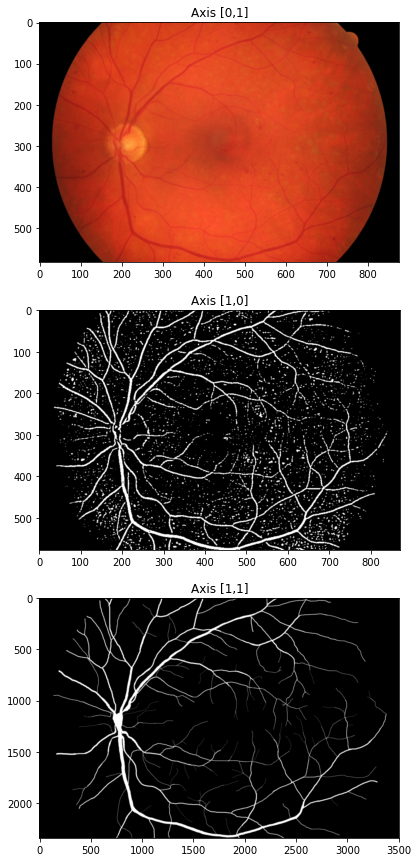

In [685]:
    from skimage.morphology import binary_closing
    
    f, axarr = plt.subplots(3, 1, figsize=(15,15))

    
    axarr[0].imshow(img1, cmap='gray', interpolation='bilinear')
    
    axarr[0].set_title('Axis [0,1]')
    axarr[1].imshow(ret, cmap='gray', interpolation='bilinear')
    axarr[1].set_title('Axis [1,0]')
    axarr[2].imshow(Image.open("manual1/" + (testImg)[:-4] + ".tif"), cmap='gray', interpolation= 'bilinear')
    axarr[2].set_title('Axis [1,1]')

In [645]:
model2 = keras.Sequential([
    keras.layers.Dense(40, input_shape=(7,), activation=tf.nn.sigmoid),
    keras.layers.Dense(1, activation=keras.activations.sigmoid)
])

model2.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])

labels2, train2 = Samples2()
labels2 = np.array(labels2)
train2 = np.array(train2)
print(train2.shape)
model2.fit(train2, labels2, epochs=15)




Dane zsamplowane2
45000 labels and 45000 inputs
(45000, 7)
Epoch 1/15
45000/45000 [==============================] - 7s 152us/sample - loss: 0.2976 - binary_accuracy: 0.9117
Epoch 2/15
45000/45000 [==============================] - 5s 111us/sample - loss: 0.2928 - binary_accuracy: 0.9117
Epoch 3/15
45000/45000 [==============================] - 5s 101us/sample - loss: 0.2899 - binary_accuracy: 0.9117
Epoch 4/15
45000/45000 [==============================] - 5s 108us/sample - loss: 0.2877 - binary_accuracy: 0.9117
Epoch 5/15
45000/45000 [==============================] - 4s 99us/sample - loss: 0.2862 - binary_accuracy: 0.9117
Epoch 6/15
45000/45000 [==============================] - 4s 100us/sample - loss: 0.2850 - binary_accuracy: 0.9117
Epoch 7/15
45000/45000 [==============================] - 5s 102us/sample - loss: 0.2840 - binary_accuracy: 0.9117
Epoch 8/15
45000/45000 [==============================] - 4s 100us/sample - loss: 0.2831 - binary_accuracy: 0.9117
Epoch 9/15
45000/45000

In [649]:
def test2(img):
    half = int((size-1) /2)
    
    img = rgb2gray(img)
    x=[]
    #res = np.ones((img.shape[0]-2*half, img.shape[1]-2*half))
    
    for i in range(half, img.shape[0]-half):
        for j in range(half, img.shape[1]-half):
            fil = getFilters2(img, i, j)
            x.append(fil)

            
    x = np.array(x)
    print(x.shape[0])
    predict = model2.predict(x)
    return predict

img2 = cv2.resize(io.imread("images/"+testImg), None, fx = 0.25, fy = 0.25, interpolation = cv2.INTER_CUBIC)

pre2 = test2(img2)
pre2 = pre2.reshape((584-2*int((size-1) /2), -1))

Exception ignored in: <function ScopedTFStatus.__del__ at 0x0000021F35770EA0>
Traceback (most recent call last):
  File "c:\users\corpt\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\c_api_util.py", line 39, in __del__
    c_api.TF_DeleteStatus(self.status)
AttributeError: 'ScopedTFStatus' object has no attribute 'status'


502860


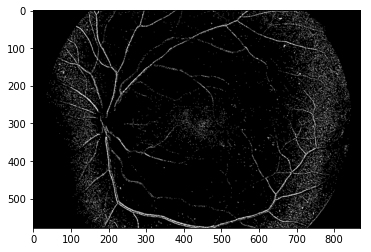

In [656]:
ret2 = pre2 > 0.12

ret3 = ret | ret2
plt.imshow(ret2,cmap='gray', interpolation='bilinear')